## Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if we need to change directory to the project root
if os.path.basename(current_dir) == 'Scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'Scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import modules
try:
    from preprocessing import ReviewPreprocessor
    try:
        from scraper import main as run_scraper
    except ImportError:
        from scraper import main as run_scraper
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

Current working directory: c:\Users\hp\Desktop\python-projects\GooglePlay-scraping_week-2\Scripts
Changed working directory to: c:\Users\hp\Desktop\python-projects\GooglePlay-scraping_week-2


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Fetching app info...

Scraping reviews...


  0%|          | 0/3 [00:00<?, ?it/s]

Scraping 450 reviews for app ID: com.combanketh.mobilebanking...


 33%|███▎      | 1/3 [00:07<00:14,  7.25s/it]

Successfully scraped 8119 reviews.
Scraping 450 reviews for app ID: com.boa.boaMobileBanking...


 67%|██████▋   | 2/3 [00:09<00:04,  4.47s/it]

Successfully scraped 1185 reviews.
Scraping 450 reviews for app ID: com.dashen.dashensuperapp...


100%|██████████| 3/3 [00:11<00:00,  3.98s/it]

Successfully scraped 764 reviews.
Sample reviews:
                              review_id  \
0  5112423d-e618-44ba-ba49-62677cb76cd6   
1  bcb34681-1dd4-4781-b400-4393bb10b1d9   
2  c69f051a-00f8-4144-8423-b7ebcd328d2d   

                                         review_text  rating  \
0  This application is very important and advanta...       5   
1                          why didn't work this app?       1   
2      The app makes our life easier. Thank you CBE!       5   

          review_date      user_name  thumbs_up reply_content bank_code  \
0 2025-11-27 23:08:20  A Google user          0          None       CBE   
1 2025-11-27 22:40:35  A Google user          0          None       CBE   
2 2025-11-27 18:00:06  A Google user          0          None       CBE   

                     bank_name app_id             source  
0  Commercial Bank of Ethiopia         Google Play Store  
1  Commercial Bank of Ethiopia         Google Play Store  
2  Commercial Bank of Ethiopia         Goo

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
1,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
2,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-27 18:00:06,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
3,d2995fb9-63c6-4bfc-8d3c-93a0ee9dba8f,this app very bad 👎,1,2025-11-27 16:28:10,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
4,f8002d06-b5c5-4ed1-9d51-a9a379304cf8,the most advanced app. but how to stay safe?,5,2025-11-27 10:03:41,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [3]:
import pandas as pd

# 1. Load raw data
raw_path = "data/raw/raw_reviews.csv"
df = pd.read_csv(raw_path)

print(f"Loaded {len(df)} rows")

# 2. Remove rows where 'user_name' is null or empty
before = len(df)

df = df[df['user_name'].notna() & (df['user_name'].astype(str).str.strip() != "")]

after = len(df)

print(f"Removed {before - after} rows with null or empty user_name")
print(f"Remaining rows: {after}")

# 3. Save cleaned data
df.to_csv(raw_path, index=False)
print(f"Cleaned file saved to: {raw_path}")


Loaded 10068 rows
Removed 0 rows with null or empty user_name
Remaining rows: 10068
Cleaned file saved to: data/raw/raw_reviews.csv


In [4]:
df.sample(5)

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
9930,a34ea67e-01a2-487d-b414-b2d41d0572a2,I have used many mobile banking and also telle...,5,2025-03-12 09:52:45,yibe teklu,24,NaN,DASHENBANK,Dashen Bank,NaN,Google Play Store
3015,a430cccc-982c-4ea8-926a-2c6a085200a7,700000 a,5,2024-06-26 23:33:22,A Google user,1,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store
3116,3d495514-cd0d-40f5-b3e7-bbfe295b0059,This application is very useful and incredible...,5,2024-05-31 20:50:07,A Google user,3,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store
8106,ff77591e-52cc-4783-89ea-5018a376d6e8,As wr wb,5,2014-02-26 00:46:53,A Google user,2,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store
5446,fe581ce0-d9b6-4838-9c32-8d98de12f16e,"The app is good. However, whenever you changed...",3,2023-03-10 21:54:58,A Google user,97,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store


## Describing data but per bank

In [6]:
import pandas as pd

df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Generate describe() per bank
bank_descriptions = df.groupby("bank_code").describe()

print(bank_descriptions)


            rating                                             
             count      mean       std  min  25%  50%  75%  max
bank_code                                                      
BOA          720.0  2.577778  1.801577  1.0  1.0  1.0  5.0  5.0
CBE         4542.0  3.770586  1.606455  1.0  2.0  5.0  5.0  5.0
DASHENBANK   490.0  4.075510  1.541655  1.0  3.0  5.0  5.0  5.0


In [7]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 10068 reviews

[1/6] Checking for missing data...

Missing values:
  review_text: 7 (0.07%)
  reply_content: 9997 (99.29%)
  app_id: 10068 (100.00%)

review_text    7
dtype: int64

[2/6] Handling missing values...
Removed 7 rows with missing critical values

[3/6] Normalizing dates...
Date range: 2014-02-17 to 2025-11-27

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 10061 reviews

Saving processed data...
Data saved to: data/processed/processed_reviews.csv

PREPROCESSING REPORT

Original records: 10068
Records with missing critical data: 7
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 10061

Data retention rate: 99.93%
Data error rate: 0.07%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Commercial Bank of Ethiopia: 8112
  Bank of Abyssinia: 1185
  Dashen Bank: 764

Rating distribution:
  ⭐⭐⭐⭐⭐: 6347 (63.1%)
  ⭐⭐⭐⭐: 

## 3. Visualizations

Let's explore the cleaned data.

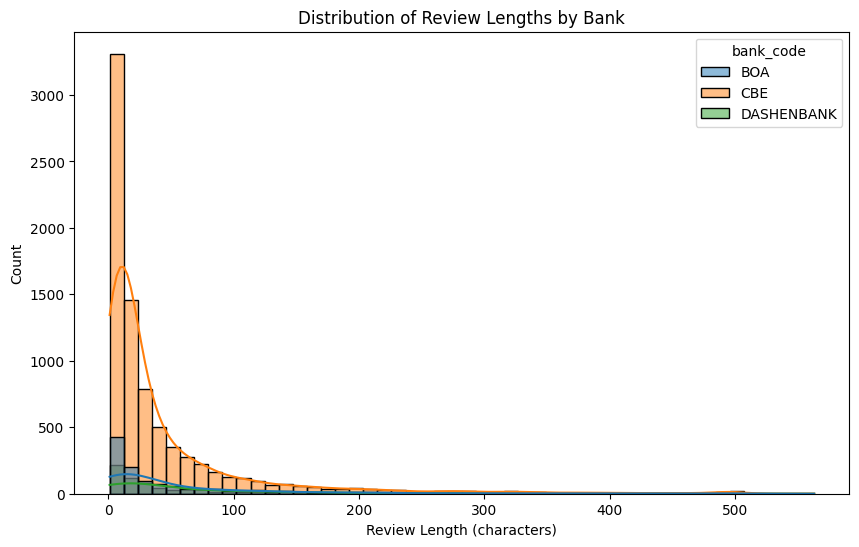

In [8]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()

## More preprocessing 
Remove duplicates, handle missing data.
Normalize dates (e.g., to YYYY-MM-DD).
Save as CSV with columns: review, rating, date, bank, source.

In [9]:
import pandas as pd

# ============================
# 1. Load raw data
# ============================
raw_path = "data/raw/raw_reviews.csv"
df = pd.read_csv(raw_path)

print(f"Loaded {len(df)} rows")

# ============================
# 2. Remove duplicates
# ============================
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed {before - after} duplicate rows")

# ============================
# 3. Handle missing data
#    - Remove rows where review or rating is missing
# ============================
before = len(df)

required_cols = ["review_text", "rating", "review_date", "bank_name", "source"]

df = df.dropna(subset=required_cols)

after = len(df)
print(f"Removed {before - after} rows with missing critical fields")

# ============================
# 4. Normalize date format
#    Convert any date format → YYYY-MM-DD
# ============================
df["date"] = pd.to_datetime(df["review_date"], errors="coerce").dt.date

# Remove rows where date could not be parsed
df = df.dropna(subset=["date"])

# Convert date objects to string
df["date"] = df["date"].astype(str)

# ============================
# 5. Keep only required columns
# ============================
df = df[["review_text", "rating", "review_date", "bank_name", "bank_code", "source"]]

# ============================
# 6. Save cleaned data
# ============================
clean_path = "data/processed/cleaned_reviews.csv"
df.to_csv(clean_path, index=False)

print(f"Cleaned data saved to: {clean_path}")
print(f"Final row count: {len(df)}")


Loaded 10068 rows
Removed 0 duplicate rows
Removed 7 rows with missing critical fields
Cleaned data saved to: data/processed/cleaned_reviews.csv
Final row count: 10061


## Categorizing banks by bank_code 

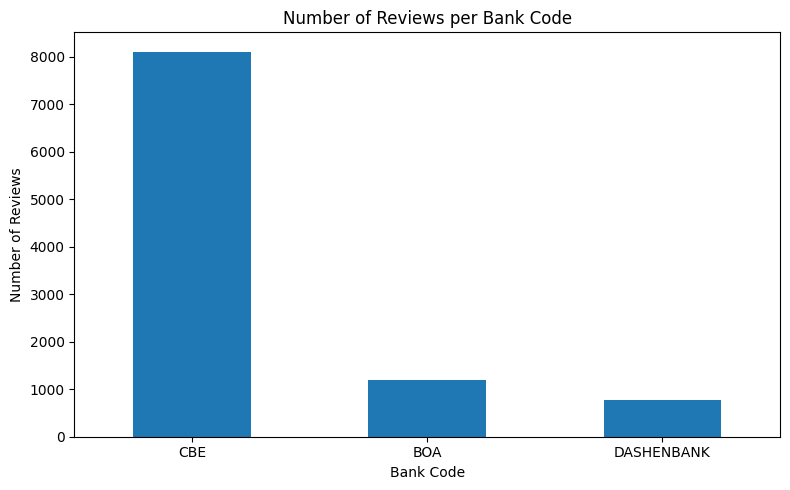

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# If your cleaned file is already saved:
df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Count reviews per bank_code
bank_counts = df["bank_code"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
bank_counts.plot(kind="bar")

plt.xlabel("Bank Code")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Bank Code")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## Deleting duplicate rows

In [12]:
import pandas as pd

# Load your data
df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Count duplicates BEFORE removal
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows found: {duplicate_count}")

# Drop duplicates
df = df.drop_duplicates()

print(f"Duplicate rows removed: {duplicate_count}")
print(f"Remaining rows: {len(df)}")

# Save cleaned file
df.to_csv("data/processed/cleaned_reviews.csv", index=False)

print("\nCleaned dataframe saved to data/processed/cleaned_reviews.csv")


Number of duplicate rows found: 0
Duplicate rows removed: 0
Remaining rows: 10061

Cleaned dataframe saved to data/processed/cleaned_reviews.csv


## using langdetect to remove all Amharic texts

In [13]:
from langdetect import detect, LangDetectException
import pandas as pd

# Load data
df = pd.read_csv("data/processed/cleaned_reviews.csv")

def is_english(text):
    try:
        return detect(text) == "en"
    except LangDetectException:
        return False   # treat failed detection as non-English

# Count rows *before* filtering (by bank)
before_counts = df.groupby("bank_code").size()

# Apply English filter
filtered_df = df[df["review_text"].apply(is_english)]

# Count rows *after* filtering
after_counts = filtered_df.groupby("bank_code").size()

# Compute deleted rows per bank_code
deleted_counts = before_counts - after_counts

# Print results
print("=== Non-English Reviews Removed Per Bank ===\n")

for bank in before_counts.index:
    print(f"{bank}: Deleted {deleted_counts.get(bank, 0)} reviews "
          f"(Before: {before_counts[bank]}, After: {after_counts.get(bank, 0)})")

# Save the filtered dataframe
filtered_df.to_csv("data/processed/cleaned_reviews.csv", index=False)

print("\nCleaned file saved to data/processed/cleaned_reviews.csv")


=== Non-English Reviews Removed Per Bank ===

BOA: Deleted 453 reviews (Before: 1185, After: 732)
CBE: Deleted 3508 reviews (Before: 8112, After: 4604)
DASHENBANK: Deleted 271 reviews (Before: 764, After: 493)

Cleaned file saved to data/processed/cleaned_reviews.csv


## Checking the data after the use of langdetect to remove Amharic reviews

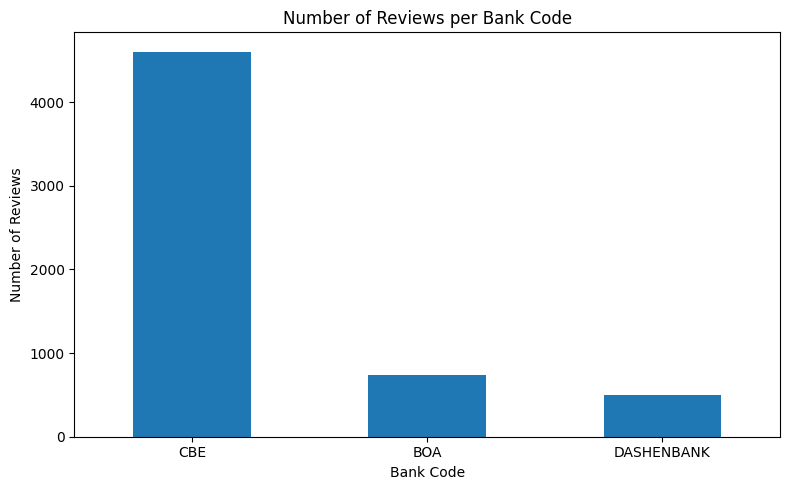

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# If your cleaned file is already saved:
df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Count reviews per bank_code
bank_counts = df["bank_code"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
bank_counts.plot(kind="bar")

plt.xlabel("Bank Code")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Bank Code")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## Randomly deleting 3000 of the scrapped 4000

* the point of removing the data is because the CBE data is 4 times as much and it might end up skewing the entire result.

In [2]:
import pandas as pd

# Load your data
df = pd.read_csv("../Data/processed/cleaned_reviews.csv")

# Filter CBE rows
cbe_df = df[df["bank_code"] == "CBE"]

# Check if you have enough rows
print("Total CBE rows:", len(cbe_df))

rows_to_remove = 3000
if len(cbe_df) < rows_to_remove:
    raise ValueError("Not enough CBE rows to remove 3000!")

# Randomly sample 3000 rows to delete
cbe_to_delete = cbe_df.sample(n=rows_to_remove, random_state=42)

# Remove them from the main DF
df_filtered = df.drop(cbe_to_delete.index)

print("Deleted rows:", len(cbe_to_delete))
print("Remaining CBE rows:", len(df_filtered[df_filtered['bank_code'] == 'CBE']))

# Save result
output_path = "../Data/processed/cleaned_reviews_reduced.csv"
df_filtered.to_csv(output_path, index=False)

print(f"\nSaved reduced dataset to:\n{output_path}")


Total CBE rows: 4604
Deleted rows: 3000
Remaining CBE rows: 1604

Saved reduced dataset to:
../Data/processed/cleaned_reviews_reduced.csv


## Rating sentiment per bank

* rating >4 -> postive
* rating <3 -> negative
* rating =3 -> neutral


Rating distribution per bank:
rating_grade  Negative  Neutral  Positive
bank_code                                
BOA                375      124       233
CBE                320      399       885
DASHENBANK          77       70       346


<Figure size 800x500 with 0 Axes>

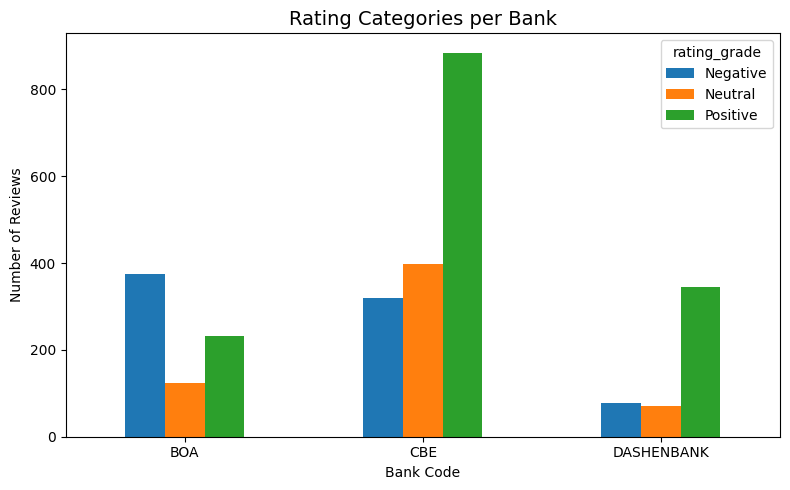

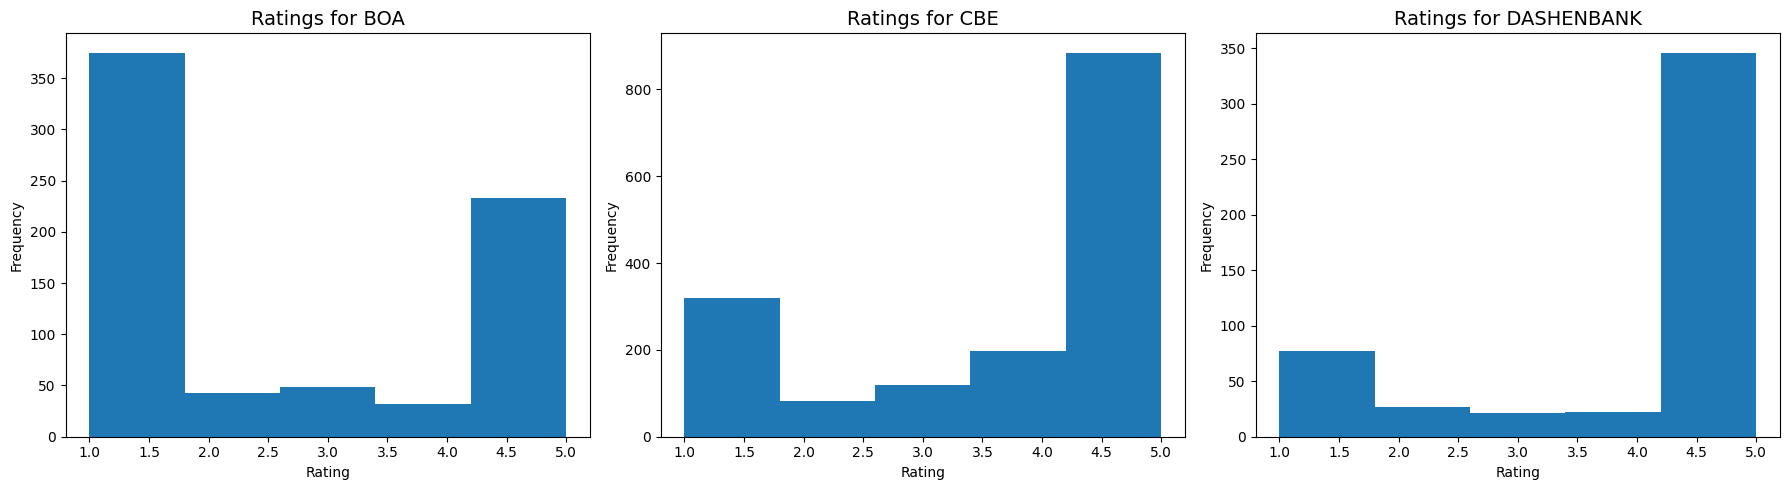

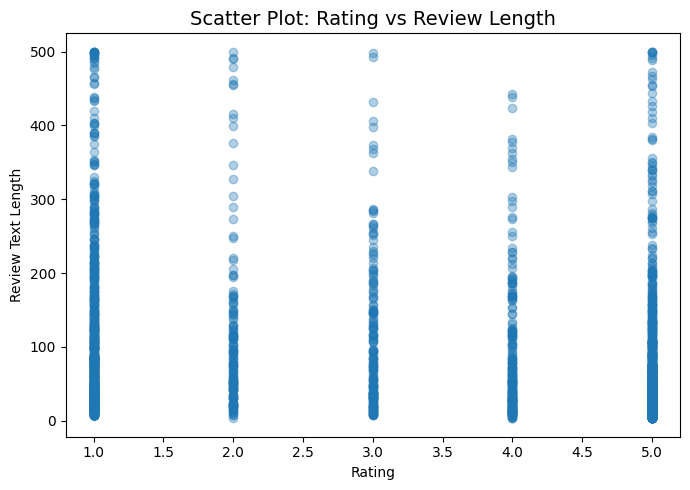

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load data
# ---------------------------
df = pd.read_csv("../Data/processed/cleaned_reviews_reduced.csv")

# ---------------------------
# 2. Grade numeric rating
# ---------------------------
def grade_rating(r):
    if r > 4:
        return "Positive"
    elif r == 4:
        return "Neutral"
    elif r < 2:
        return "Negative"
    else:
        return "Neutral"  # default for rating=2 or 3

df["rating_grade"] = df["rating"].apply(grade_rating)

# ---------------------------
# 3. Count per bank
# ---------------------------
rating_per_bank = df.groupby(["bank_code", "rating_grade"]).size().unstack(fill_value=0)

print("\nRating distribution per bank:")
print(rating_per_bank)

# ============================================================
# 4. VISUALIZATIONS
# ============================================================

# ---------------------------
# BAR GRAPH (per bank)
# ---------------------------
plt.figure(figsize=(8, 5))
rating_per_bank.plot(kind="bar", figsize=(8, 5))

plt.title("Rating Categories per Bank", fontsize=14)
plt.ylabel("Number of Reviews")
plt.xlabel("Bank Code")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ---------------------------
# HISTOGRAMS PER BANK
# ---------------------------

# Get list of banks
banks = df["bank_code"].unique()
banks = sorted(banks)  # optional order: ['BOA', 'CBE', 'DASHENBANK']

# Number of banks
n_banks = len(banks)

plt.figure(figsize=(6 * n_banks, 5))

for i, bank in enumerate(banks, 1):
    bank_df = df[df["bank_code"] == bank]

    plt.subplot(1, n_banks, i)
    plt.hist(bank_df["rating"], bins=5)
    plt.title(f"Ratings for {bank}", fontsize=14)
    plt.xlabel("Rating")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ---------------------------
# SCATTER PLOT (rating vs review length)
# ---------------------------
df["review_length"] = df["review_text"].astype(str).apply(len)

plt.figure(figsize=(7, 5))
plt.scatter(df["rating"], df["review_length"], alpha=0.35)

plt.title("Scatter Plot: Rating vs Review Length", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Review Text Length")
plt.tight_layout()
plt.show()


## Using distilbert-base-uncased-finetuned-sst-2-english to compute sentiment scores


In [3]:
import pandas as pd
from transformers import pipeline

# =============================
# 1. Load cleaned dataset
# =============================
df = pd.read_csv("../Data/processed/cleaned_reviews_reduced.csv")

print(f"Loaded {len(df)} rows")

# =============================
# 2. Load DistilBERT SST-2 model
# =============================
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

# =============================
# 3. Function to classify sentiment
# =============================
def classify_sentiment(text, threshold=0.60):
    if not isinstance(text, str) or text.strip() == "":
        return "neutral", 0.0
    
    result = sentiment_pipeline(text)[0]

    label = result["label"].lower()   # "positive" or "negative"
    score = float(result["score"])    # confidence score

    # Convert to 3-class (positive / negative / neutral)
    if score < threshold:
        final_label = "neutral"
    else:
        final_label = label

    return final_label, score


# =============================
# 4. Apply sentiment model
# =============================
sentiments = df["review_text"].apply(lambda x: classify_sentiment(x))

df["sentiment_label"] = sentiments.apply(lambda x: x[0])
df["sentiment_score"] = sentiments.apply(lambda x: x[1])

print("Sentiment analysis complete!")
print(df[["review_text", "sentiment_label", "sentiment_score"]].head())

# =============================
# 5. Save results
# =============================
output_path = "../Output/cleaned_reviews_with_sentiment.csv"
df.to_csv(output_path, index=False)

print(f"\nSaved sentiment-enhanced dataset to:\n{output_path}")


Loaded 2829 rows


'(ProtocolError('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)), '(Request ID: a65e65f9-1744-4a37-a7be-e47fe7dbc6f2)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english/resolve/main/config.json
Retrying in 1s [Retry 1/5].
Device set to use cpu


Sentiment analysis complete!
                                     review_text sentiment_label  \
0  The app makes our life easier. Thank you CBE!        positive   
1                            this app very bad 👎        negative   
2   the most advanced app. but how to stay safe?        negative   
3                               Good application        positive   
4     very good banking service and fast service        positive   

   sentiment_score  
0         0.999696  
1         0.999797  
2         0.956509  
3         0.999855  
4         0.999850  

Saved sentiment-enhanced dataset to:
../Output/cleaned_reviews_with_sentiment.csv


In [1]:
import nltk
nltk.download("punkt", download_dir=r"C:\nltk_data")
nltk.download("stopwords", download_dir=r"C:\nltk_data")
nltk.download('punkt_tab', download_dir=r"C:\nltk_data")
nltk.download('vader_lexicon', download_dir=r"C:\nltk_data")
nltk.download('wordnet', download_dir=r"C:\nltk_data")

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data] Downloading package wordnet to C:\nltk_data...


True

## Thematic analysis pipeline for the cleaned and reduced bank csv file

* here i have categorized data into 5 themes. namely the Theme_0, Theme_1, Theme_2, Theme_3 and Theme_4.

In [2]:
# Notebook: thematic_analysis_run.ipynb

# Import module
from Thematic_analysis import ThematicAnalyzer
import pandas as pd

# Load preprocessed reviews
df = pd.read_csv("../Data/processed/cleaned_reviews_reduced.csv")

# Initialize analyzer
analyzer = ThematicAnalyzer(n_themes=5)

# Run pipeline
df_with_themes = analyzer.process(df)

# Save results
df_with_themes.to_csv("../output/cleaned_reviews_with_themes.csv", index=False)

# Quick check
df_with_themes.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessing review text...
Extracting keywords via TF-IDF...
Clustering into 5 themes per bank...
Thematic analysis complete.


,review_text,rating,review_date,bank_name,bank_code,source,cleaned_text,keywords,theme
0,The app makes our life easier. Thank you CBE!,5,2025-11-27 18:00:06,Commercial Bank of Ethiopia,CBE,Google Play Store,app make life easier thank cbe,"easier, life, thank, make, cbe",Theme_0
1,this app very bad 👎,1,2025-11-27 16:28:10,Commercial Bank of Ethiopia,CBE,Google Play Store,app bad,"bad, app, 247, 240426, 24",Theme_0
2,the most advanced app. but how to stay safe?,5,2025-11-27 10:03:41,Commercial Bank of Ethiopia,CBE,Google Play Store,advanced app stay safe,"stay, advanced, safe, app, 247",Theme_0
3,Good application,4,2025-11-27 08:59:12,Commercial Bank of Ethiopia,CBE,Google Play Store,good application,"application, good, 247, 240426, 24",Theme_0
4,very good banking service and fast service,5,2025-11-24 21:09:29,Commercial Bank of Ethiopia,CBE,Google Play Store,good banking service fast service,"service, fast, banking, good, 240426",Theme_0


In [18]:
df = pd.read_csv("../output/cleaned_reviews_with_themes.csv")
df.sample(5)

,review_text,rating,review_date,bank_name,bank_code,source,cleaned_text,keywords,theme
2446,safe and secure,3,2025-09-18 09:52:51,Dashen Bank,DASHENBANK,Google Play Store,safe secure,"safe, secure, 25000, 25, 247",Theme_4
410,Best ethiopian bank,5,2024-10-28 19:49:52,Commercial Bank of Ethiopia,CBE,Google Play Store,best ethiopian bank,"ethiopian, best, bank, 240426, 24",Theme_0
1187,How can i get akey word of this app.?,5,2022-03-04 17:40:32,Commercial Bank of Ethiopia,CBE,Google Play Store,get akey word app,"akey, word, get, app, 240426",Theme_0
2011,Exceptional service,5,2024-05-13 15:28:02,Bank of Abyssinia,BOA,Google Play Store,exceptional service,"exceptional, service, 25, 247, 240426",Theme_4
1248,My internate banking is not allowing me to tra...,1,2022-02-04 14:00:15,Commercial Bank of Ethiopia,CBE,Google Play Store,internate banking allowing transfer another ba...,"trysting, nmbranch, internate, dislike, contact",Theme_0


## Extracting keywords in each theme per bank


=========== BANK: CBE ===========


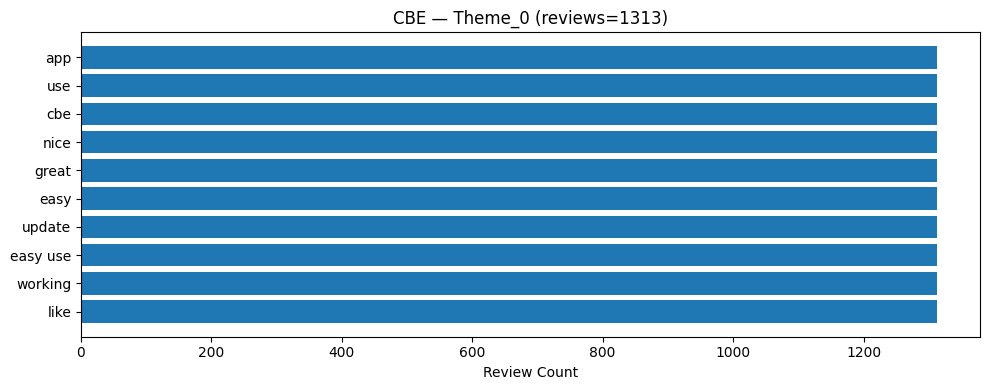

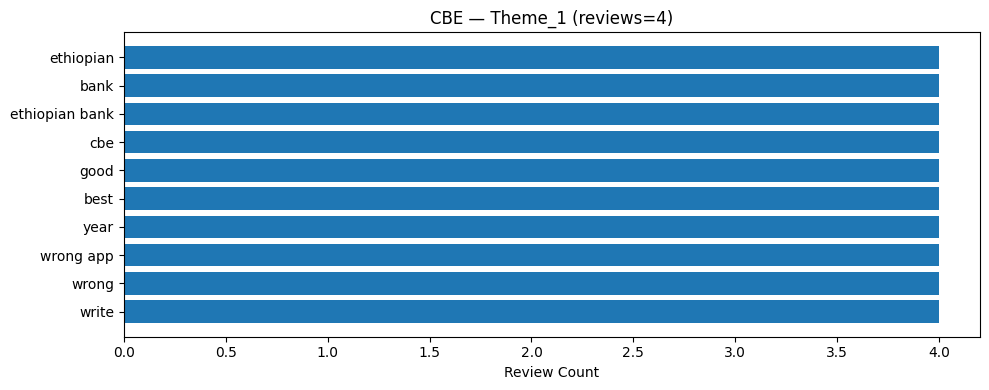

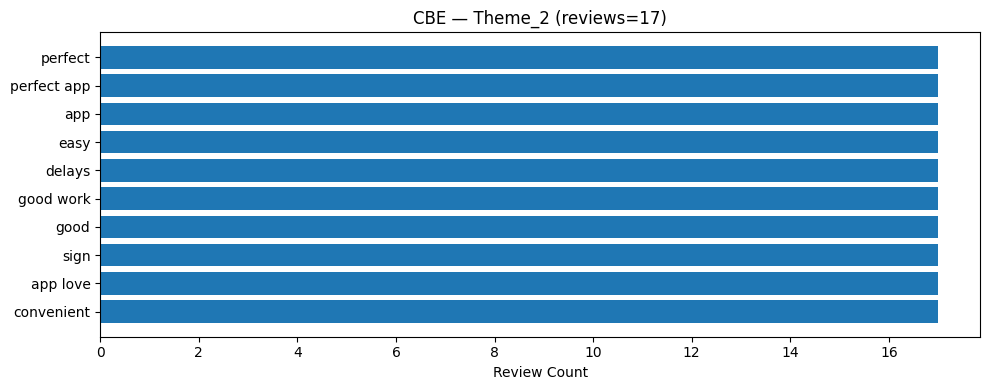

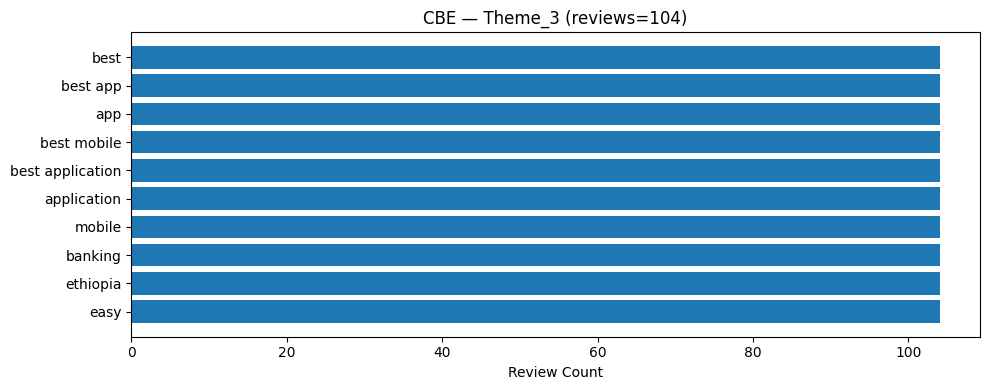

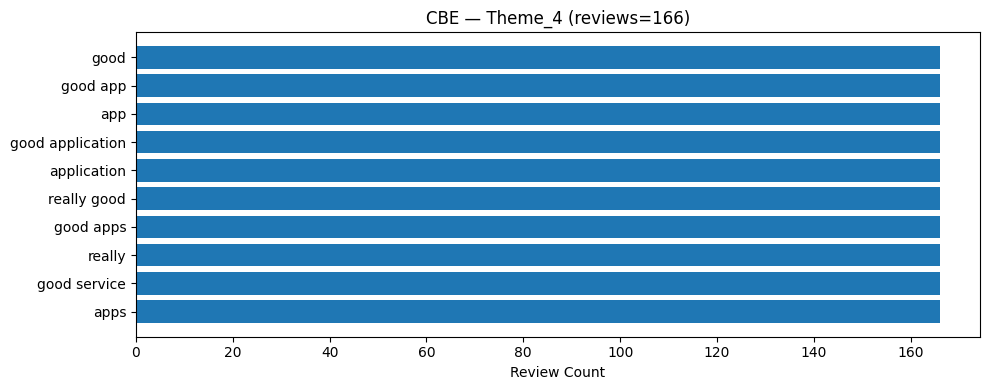


=========== BANK: BOA ===========


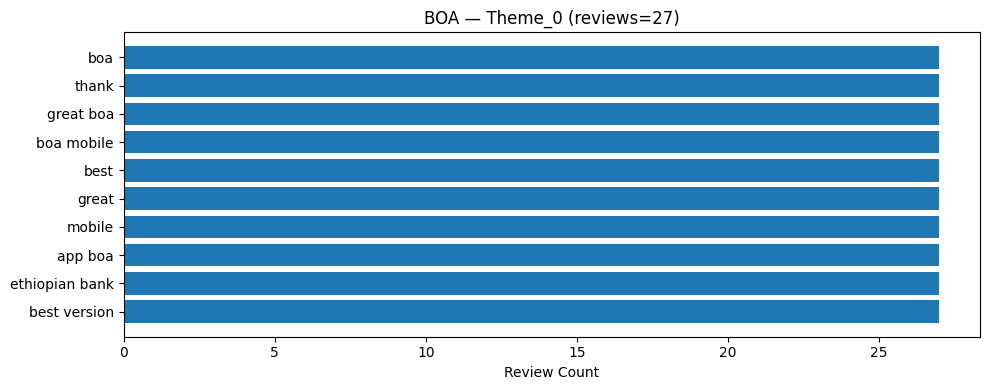

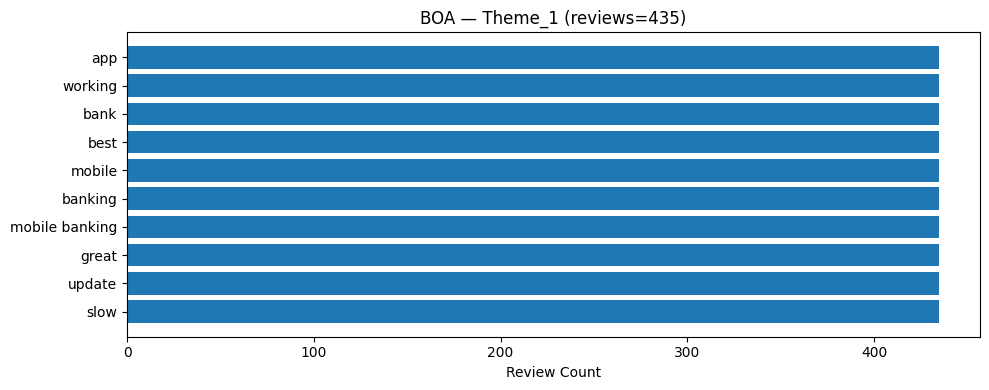

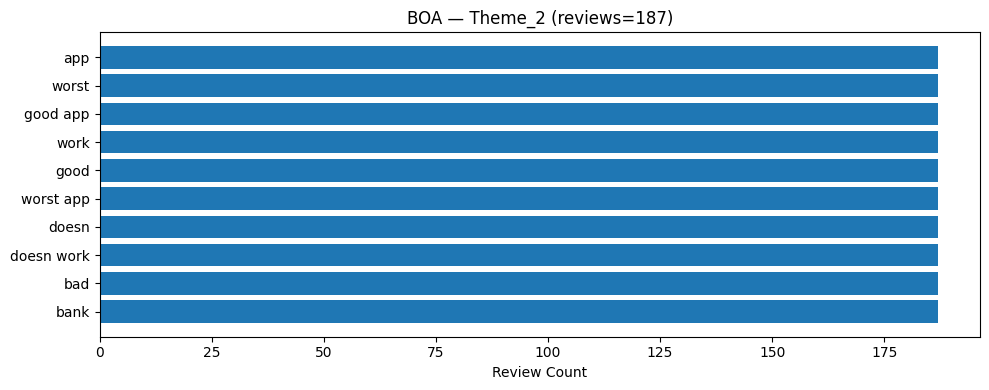

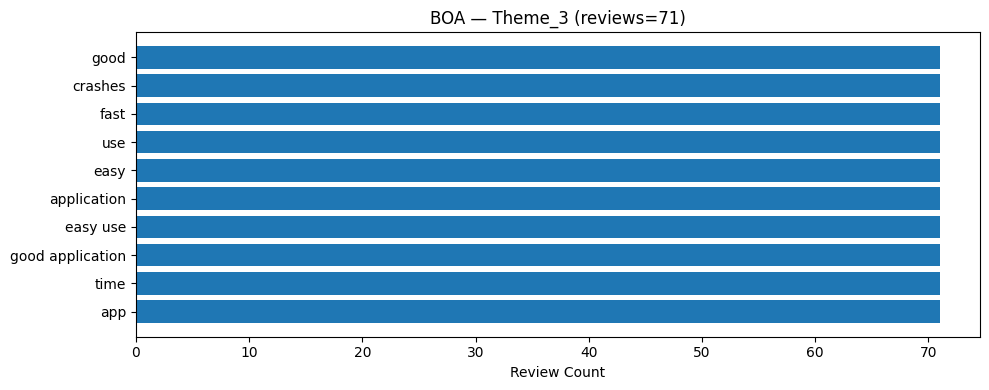

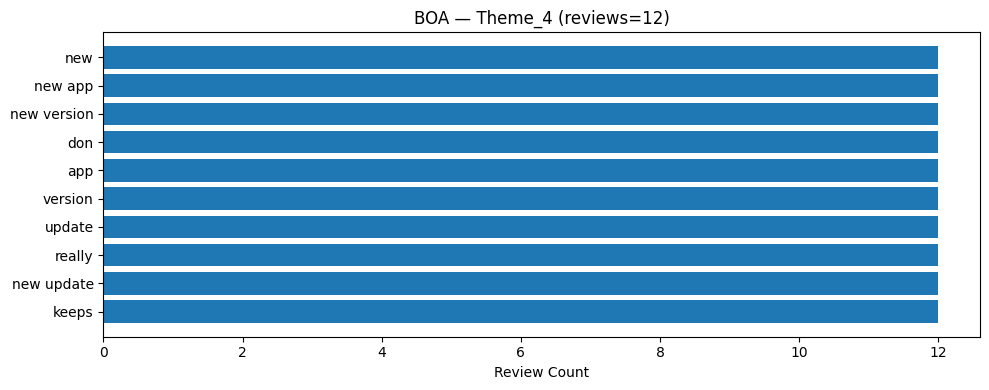


=========== BANK: DASHENBANK ===========


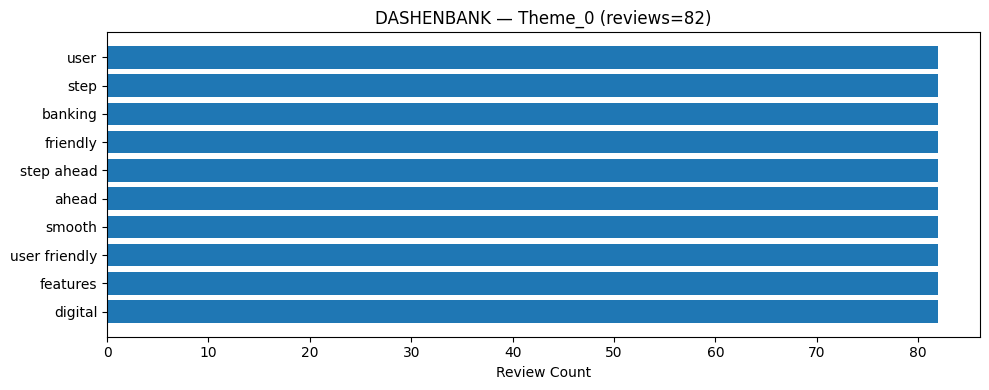

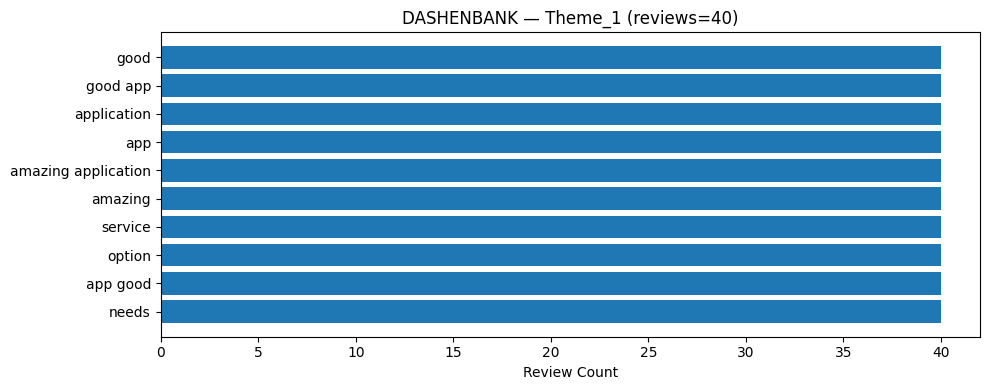

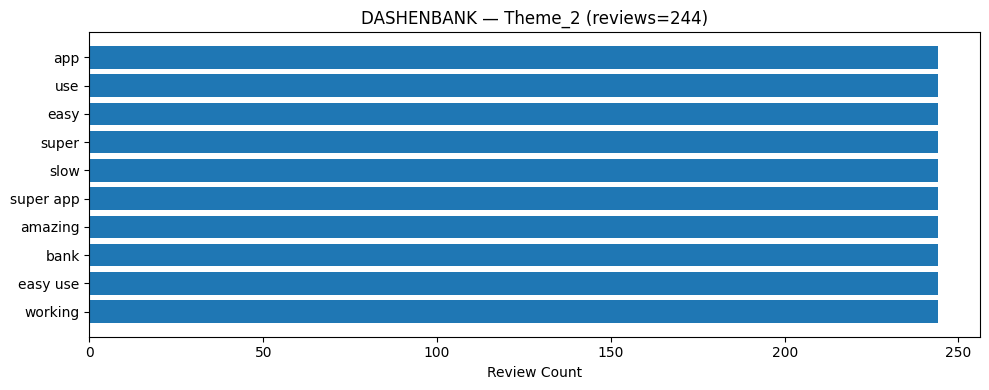

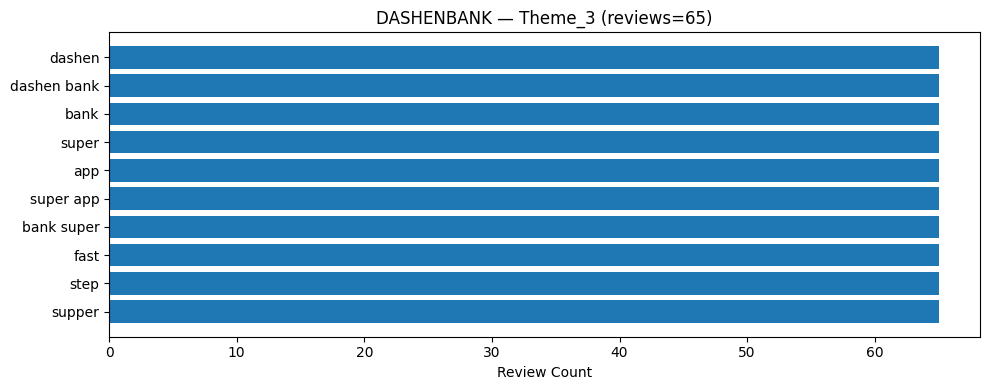

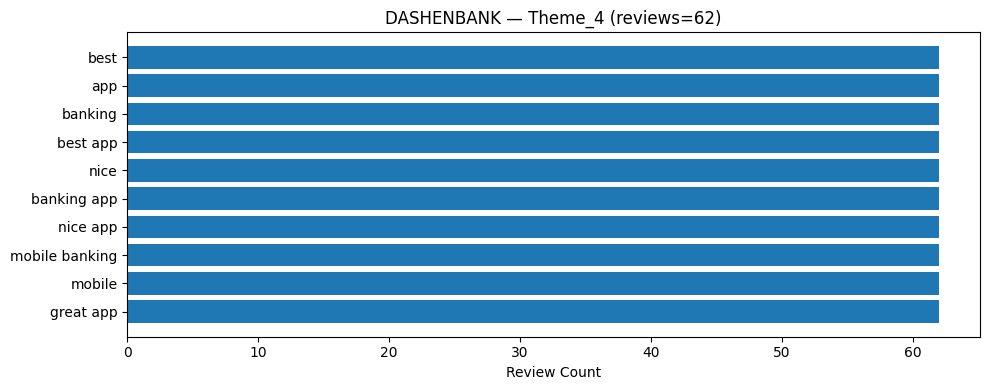

In [22]:
# =========================================================
# 1. IMPORTS
# =========================================================
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt


# =========================================================
# 2. LOAD DATA
# =========================================================
df = pd.read_csv("../output/cleaned_reviews_with_themes.csv")

required_cols = ["review_text", "bank_code"]
for col in required_cols:
    assert col in df.columns, f"Missing column: {col}"

df["review_text"] = df["review_text"].fillna("")


# =========================================================
# 3. TEXT CLEANING (FAST)
# =========================================================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df["cleaned_text"] = df["review_text"].apply(clean_text)


# =========================================================
# 4. TF-IDF (OPTIMIZED)
# =========================================================
vectorizer = TfidfVectorizer(
    max_features=7000,       # more features → better keywords
    min_df=3,                # ignore rare words
    stop_words="english",
    ngram_range=(1, 2)
)

tfidf_matrix = vectorizer.fit_transform(df["cleaned_text"])
tfidf_matrix = normalize(tfidf_matrix)   # boosts clustering quality
feature_names = vectorizer.get_feature_names_out()


# =========================================================
# 5. THEMATIC CLUSTERING PER BANK (OPTIMIZED)
# =========================================================
df["theme"] = -1
unique_banks = df["bank_code"].unique()

for bank in unique_banks:
    bank_mask = df["bank_code"] == bank
    bank_matrix = tfidf_matrix[bank_mask.values]

    n_reviews = bank_matrix.shape[0]
    n_themes = min(5, max(1, n_reviews // 50))   # auto-tuned by dataset size

    if n_reviews < 10:
        df.loc[bank_mask, "theme"] = 0
        continue

    model = MiniBatchKMeans(
        n_clusters=n_themes,
        batch_size=256,
        random_state=42,
        n_init="auto"
    )

    labels = model.fit_predict(bank_matrix)
    df.loc[bank_mask, "theme"] = labels


# =========================================================
# 6. TOP KEYWORDS PER THEME (GLOBAL)
# =========================================================
def extract_theme_keywords(tfidf_matrix, df, feature_names, n_terms=10):
    results = {}

    for theme in sorted(df["theme"].unique()):
        mask = (df["theme"] == theme)
        theme_matrix = tfidf_matrix[mask.values]

        if theme_matrix.shape[0] == 0:
            results[f"Theme_{theme}"] = []
            continue

        avg_vec = theme_matrix.mean(axis=0).A1
        top_ids = avg_vec.argsort()[-n_terms:][::-1]

        results[f"Theme_{theme}"] = feature_names[top_ids].tolist()

    return results

theme_keywords = extract_theme_keywords(tfidf_matrix, df, feature_names)
theme_keywords


# =========================================================
# 7. TOP KEYWORDS PER BANK PER THEME
# =========================================================
def extract_keywords_bank_theme(df, tfidf_matrix, feature_names, n_terms=10):
    result = {}
    for bank in df["bank_code"].unique():
        result[bank] = {}
        bank_df = df[df["bank_code"] == bank]

        for theme in sorted(bank_df["theme"].unique()):
            mask = (df["bank_code"] == bank) & (df["theme"] == theme)
            theme_matrix = tfidf_matrix[mask.values]

            if theme_matrix.shape[0] == 0:
                result[bank][f"Theme_{theme}"] = []
                continue

            avg_vec = theme_matrix.mean(axis=0).A1
            top_ids = avg_vec.argsort()[-n_terms:][::-1]

            result[bank][f"Theme_{theme}"] = feature_names[top_ids].tolist()

    return result

bank_theme_keywords = extract_keywords_bank_theme(df, tfidf_matrix, feature_names)
bank_theme_keywords


# =========================================================
# 8. PLOT KEYWORDS BY BANK & THEME
# =========================================================
def plot_keyword_bars(bank_theme_keywords, df):
    for bank, themes in bank_theme_keywords.items():
        print(f"\n=========== BANK: {bank} ===========")

        for theme_name, keywords in themes.items():
            if len(keywords) == 0:
                continue

            theme_num = int(theme_name.split("_")[1])
            count = df[(df["bank_code"] == bank) & (df["theme"] == theme_num)].shape[0]

            plt.figure(figsize=(10, 4))
            plt.barh(keywords, [count] * len(keywords))
            plt.gca().invert_yaxis()
            plt.title(f"{bank} — {theme_name} (reviews={count})")
            plt.xlabel("Review Count")
            plt.tight_layout()
            plt.show()


plot_keyword_bars(bank_theme_keywords, df)


## Comparison of the themes of different banks THEME to THEME comparison

In [23]:
# ============================================================
# CROSS-BANK THEME SIMILARITY COMPARISON
# ============================================================
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Ensure theme keywords already exist
assert "theme" in df.columns, "You must run the clustering code first."


# ------------------------------------------------------------
# 1. Average TF-IDF vector per bank per theme
# ------------------------------------------------------------
def compute_theme_vectors(df, tfidf_matrix):
    theme_vectors = {}

    for bank in df["bank_code"].unique():
        theme_vectors[bank] = {}
        bank_df = df[df["bank_code"] == bank]

        for theme in sorted(bank_df["theme"].unique()):
            mask = (df["bank_code"] == bank) & (df["theme"] == theme)
            mat = tfidf_matrix[mask.values]

            if mat.shape[0] == 0:
                vec = np.zeros(tfidf_matrix.shape[1])  # empty theme
            else:
                vec = mat.mean(axis=0).A1  # average vector

            theme_vectors[bank][theme] = vec

    return theme_vectors


theme_vectors = compute_theme_vectors(df, tfidf_matrix)


# ------------------------------------------------------------
# 2. Compute similarity between Theme i across all banks
# ------------------------------------------------------------
def compare_themes_across_banks(theme_vectors):
    banks = list(theme_vectors.keys())
    max_theme_index = max(
        max(themes.keys()) for themes in theme_vectors.values()
    )

    comparisons = []

    for theme_id in range(max_theme_index + 1):
        row = {"theme": theme_id}

        # build matrix of bank vectors for this theme
        vectors = []
        used_banks = []

        for bank in banks:
            if theme_id in theme_vectors[bank]:
                vectors.append(theme_vectors[bank][theme_id])
                used_banks.append(bank)

        if len(vectors) < 2:
            continue

        vectors = np.vstack(vectors)
        sim_matrix = cosine_similarity(vectors)

        # fill in table: bankA-bankB : similarity_score
        for i in range(len(used_banks)):
            for j in range(i+1, len(used_banks)):
                bank_a = used_banks[i]
                bank_b = used_banks[j]
                score = sim_matrix[i, j]

                row[f"{bank_a} vs {bank_b}"] = round(float(score), 4)

        comparisons.append(row)

    return pd.DataFrame(comparisons)


theme_sim_df = compare_themes_across_banks(theme_vectors)
theme_sim_df


,theme,CBE vs BOA,CBE vs DASHENBANK,BOA vs DASHENBANK
0,0,0.0953,0.2962,0.0228
1,1,0.1639,0.0867,0.2168
2,2,0.0961,0.0939,0.5337
3,3,0.1134,0.1317,0.1277
4,4,0.1372,0.1146,0.1031


## Seeing overlapping keywords between banks for each theme

In [24]:
def overlapping_keywords(bank_theme_keywords, top_n=10):
    for bank in bank_theme_keywords:
        print(f"\n===== {bank} =====")
        for theme_name, keywords in bank_theme_keywords[bank].items():
            print(f"{theme_name}: {keywords[:top_n]}")


def print_theme_overlaps(bank_theme_keywords):
    banks = list(bank_theme_keywords.keys())
    num_themes = max(
        int(t.split("_")[1]) for themes in bank_theme_keywords.values() for t in themes
    ) + 1

    for theme_id in range(num_themes):
        print(f"\n\n========================")
        print(f"🔵 THEME {theme_id} OVERLAP ACROSS BANKS")
        print(f"========================")

        theme_kw = {
            bank: set(bank_theme_keywords[bank].get(f"Theme_{theme_id}", []))
            for bank in banks
        }

        # Pairwise intersections
        for i in range(len(banks)):
            for j in range(i+1, len(banks)):
                b1, b2 = banks[i], banks[j]
                overlap = theme_kw[b1] & theme_kw[b2]
                print(f"{b1} ∩ {b2} → {list(overlap)[:10]}")


print_theme_overlaps(bank_theme_keywords)




🔵 THEME 0 OVERLAP ACROSS BANKS
CBE ∩ BOA → ['great']
CBE ∩ DASHENBANK → []
BOA ∩ DASHENBANK → []


🔵 THEME 1 OVERLAP ACROSS BANKS
CBE ∩ BOA → ['bank', 'best']
CBE ∩ DASHENBANK → ['good']
BOA ∩ DASHENBANK → ['app']


🔵 THEME 2 OVERLAP ACROSS BANKS
CBE ∩ BOA → ['app', 'good']
CBE ∩ DASHENBANK → ['app', 'easy']
BOA ∩ DASHENBANK → ['app', 'bank']


🔵 THEME 3 OVERLAP ACROSS BANKS
CBE ∩ BOA → ['app', 'easy', 'application']
CBE ∩ DASHENBANK → ['app']
BOA ∩ DASHENBANK → ['app', 'fast']


🔵 THEME 4 OVERLAP ACROSS BANKS
CBE ∩ BOA → ['app', 'really']
CBE ∩ DASHENBANK → ['app']
BOA ∩ DASHENBANK → ['app']


## Graphs for the intersections of the keywords across multiple banks

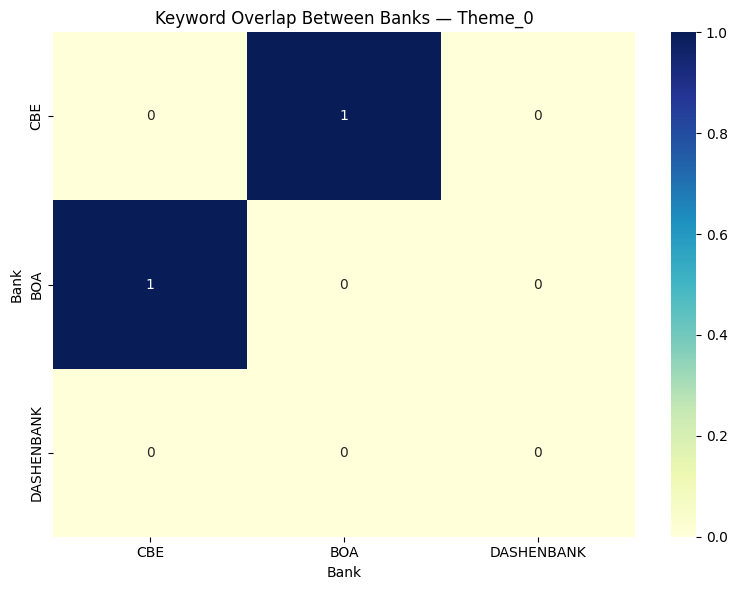

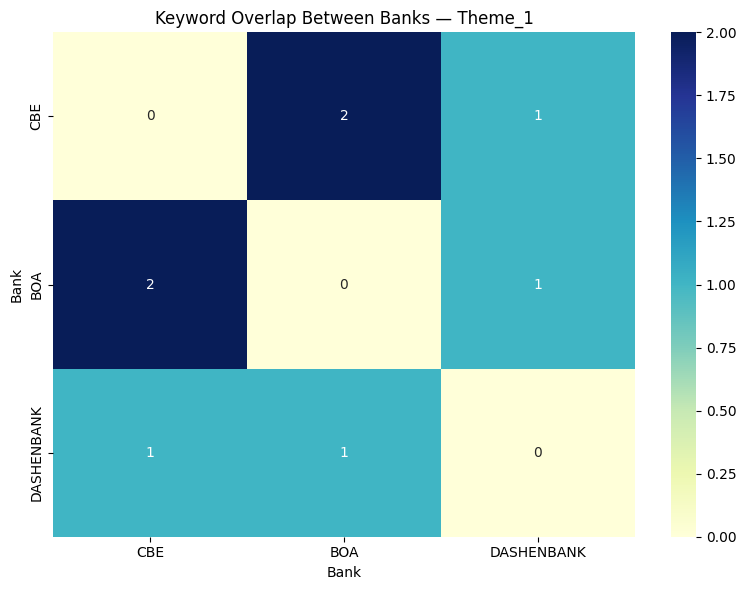

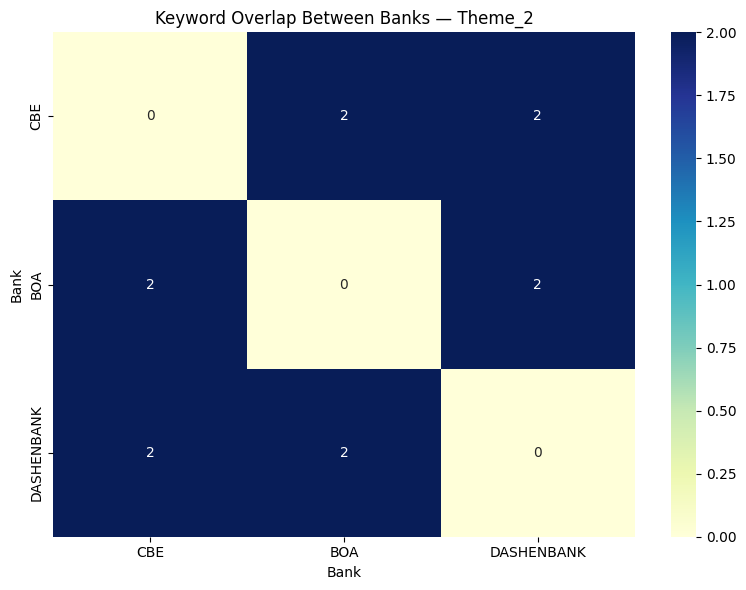

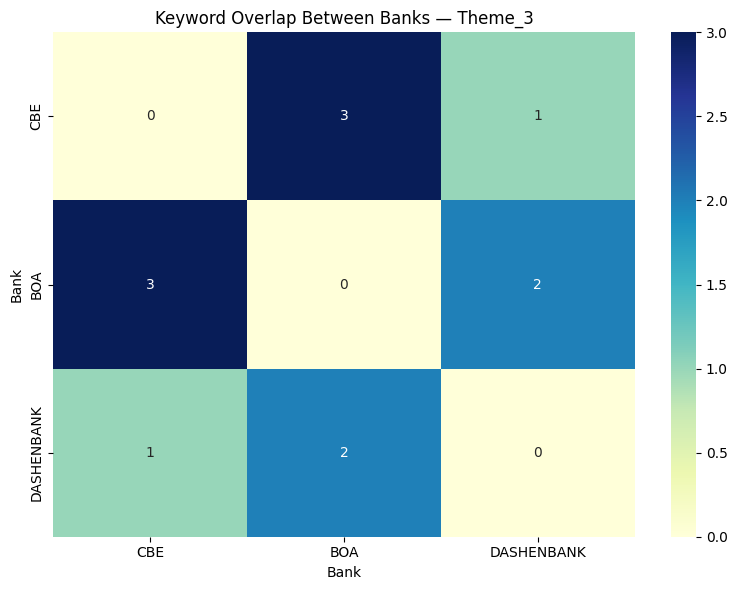

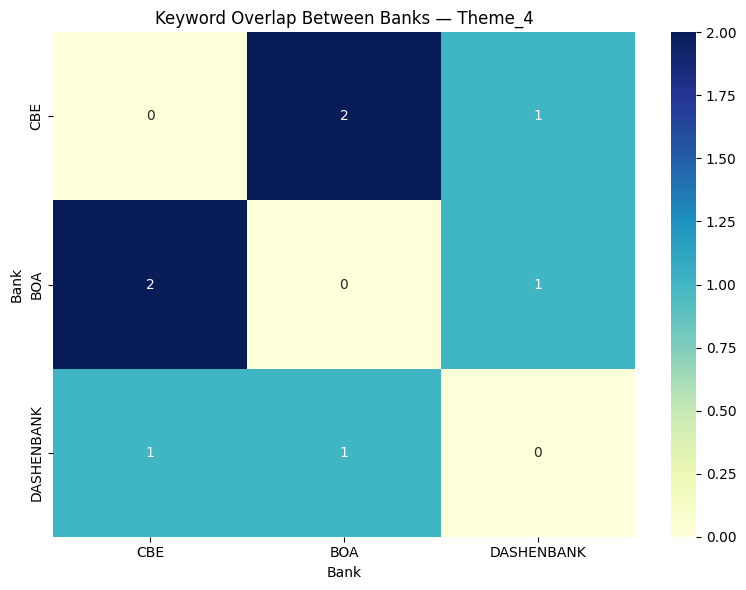

In [25]:
# =========================================================
# 1. IMPORTS
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# =========================================================
# 2. LOAD PREVIOUSLY GENERATED DATA
# =========================================================
df = pd.read_csv("../output/cleaned_reviews_with_themes.csv")
# Assuming bank_theme_keywords dictionary is already generated from previous steps
# If not, regenerate bank_theme_keywords using your TF-IDF + KMeans pipeline

# =========================================================
# 3. FUNCTION TO CALCULATE OVERLAPPING KEYWORDS BETWEEN BANKS
# =========================================================
def compute_theme_overlap(bank_theme_keywords):
    """
    Computes the number of shared keywords between each pair of banks for each theme.
    Returns a dictionary of DataFrames per theme.
    """
    themes = sorted({theme for bank in bank_theme_keywords for theme in bank_theme_keywords[bank]})
    banks = list(bank_theme_keywords.keys())
    
    overlap_dict = {}
    
    for theme in themes:
        overlap_matrix = pd.DataFrame(0, index=banks, columns=banks)
        for bank1, bank2 in combinations(banks, 2):
            kws1 = set(bank_theme_keywords[bank1].get(theme, []))
            kws2 = set(bank_theme_keywords[bank2].get(theme, []))
            overlap_count = len(kws1 & kws2)
            overlap_matrix.loc[bank1, bank2] = overlap_count
            overlap_matrix.loc[bank2, bank1] = overlap_count
        overlap_dict[theme] = overlap_matrix
    
    return overlap_dict

# =========================================================
# 4. COMPUTE OVERLAPS
# =========================================================
overlap_dict = compute_theme_overlap(bank_theme_keywords)

# =========================================================
# 5. PLOT HEATMAPS
# =========================================================
for theme, matrix in overlap_dict.items():
    plt.figure(figsize=(8,6))
    sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt="d")
    plt.title(f"Keyword Overlap Between Banks — {theme}")
    plt.ylabel("Bank")
    plt.xlabel("Bank")
    plt.tight_layout()
    plt.show()
